<a href="https://colab.research.google.com/github/Oldman3840/Mini_Project_4th/blob/main/1.%20%EB%AC%B8%EC%9D%98%20%EB%82%B4%EC%9A%A9%20%EC%9C%A0%ED%98%95%20%EB%B6%84%EB%A5%98_%EB%B6%84%EC%84%9D_%EC%A0%84%EC%B2%98%EB%A6%AC_%EC%97%90%EC%9D%B4%EB%B8%94%EB%9F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **미니프로젝트 4차 1대1 문의 내용 유형 분류기**
# 단계1 : 데이터 탐색

### 문제 정의
> 1:1 문의 내용 분류 문제<br>
> 1. 문의 내용 분석
> 2. 문의 내용 분류 모델 성능 평가
### 학습 데이터
> * 1:1 문의 내용 데이터 : train.csv

### 변수 소개
> * text : 문의 내용
> * label : 문의 유형

### References
> * 한국어 처리
>> * [konlpy - 한국어 처리 라이브러리](https://konlpy.org/ko/latest/)
>> * [한국어 품사 태그 비교표](https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0)
>> * [한국어 품사 태깅 성능 비교](https://konlpy.org/ko/latest/morph/#comparison-between-pos-tagging-classes)
>> * [한국어 시스템 사전](https://konlpy.org/ko/latest/data/#corpora)

> * 자연어 처리
>> * [NLTK](https://www.nltk.org/book/)
>> * [gensim](https://radimrehurek.com/gensim/)
>> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-2)
>> * [WordCloud](https://amueller.github.io/word_cloud/)

## 1. 개발 환경 설정

* 세부 요구사항
  - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
  - 필요하다고 판단되는 라이브러리를 추가하세요.
  - konlpy, mecab 설치 후 형태소 분석 함수 생성
  - mecab 설치할 때 윈도우 pc에서 설치는 다른 방법으로 진행
  - 윈도우 환경일 경우 KoNLPy의 라이브러리 설치가 제대로 이루어지지 않을 수 있습니다
  - 윈도우 설치를 위한 참고 링크
    - https://liveyourit.tistory.com/56

### 1-1. 라이브러리 설치

In [1]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn gensim wordcloud python-mecab-ko wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 1-2. 라이브러리 import

In [2]:
from mecab import MeCab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from collections import Counter
import wget, os
from konlpy.tag import *

plt.rc('font', family='NanumBarunGothic') 

### 1-3. 한글 글꼴 설정(Windows)

In [3]:
# if not os.path.exists("malgun.ttf"): 
#     wget.download("https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf")
# if 'malgun' not in fm.fontManager.findfont("Malgun Gothic"):
#     fm.fontManager.addfont("malgun.ttf")
# if plt.rcParams['font.family']!= ["Malgun Gothic"]:
#     plt.rcParams['font.family']= [font for font in fm.fontManager.ttflist if 'malgun.ttf' in font.fname][-1].name
# plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
# assert plt.rcParams['font.family'] == ["Malgun Gothic"], "한글 폰트가 설정되지 않았습니다."
# FONT_PATH = "malgun.ttf"

### 1-4. 자바 경로 설정(Windows)

In [4]:
# os.environ['JAVA_HOME'] = "C:\Program Files\Java\jdk-19"

### 1-3. 한글 글꼴 설정(Colab)

In [5]:
!sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [6]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
print(font_name)
plt.rcParams['font.family']=font_name
assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

NanumGothic


In [7]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

### 1-4. 구글드라이브 연결(Colab)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2.데이터 불러오기

* 주어진 데이터
 - 학습 및 검증용 데이터 : train.csv

### 2-1. 데이터 로딩

* 다음 데이터를 불러옵니다.
    * 학습 및 검증용 데이터 : train.csv
    * shape를 확인합니다.

In [9]:
path = '/content/drive/MyDrive/KT_Aivle_School/Data/4th_mini_project/train.csv'

data = pd.read_csv(path)

### 2-2. 데이터 확인하기
* 문의 유형 분포 확인
* data type, 결측치 확인

In [10]:
data

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2
...,...,...
3701,"토큰화 이후 train val 를 분리하고 각 train set, val set에 ...",코드2
3702,올린 값들 중 최고점인 건가요? 아니면 최근에 올린 파일로 무조건 갱신인가요?\n최...,시스템 운영
3703,수업에서 cacoo랑 packet tracer를 배우는 이유가\n\n1. IT 인프...,이론
3704,inplace =True 해도 값이 변경이 안되고 none으로 뜹니다. 혹시 원격지...,원격


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706 entries, 0 to 3705
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3706 non-null   object
 1   label   3706 non-null   object
dtypes: object(2)
memory usage: 58.0+ KB


In [12]:
data.isnull().sum()

text     0
label    0
dtype: int64

## 3.데이터 탐색하기


### 3-1. 문의 내용 길이 분포

* 문의 내용의 길이 분포를 확인합니다.
* 최소, 최대 길이의 index 및 문의 내용을 확인합니다.

In [ ]:
max_str = data['text'].max()
min_str = data['text'].min()

max_str_idx = data.loc[data['text'] == max_str].index
min_str_idx = data.loc[data['text'] == min_str].index

print(f'최대 길이 문의 index: {max_str_idx} \n최대 길이 문장 내용: \n{max_str}')
print(f'최소 길이 문의 index: {min_str_idx} \n최소 길이 문장 내용: \n{min_str}')

최대 길이 문의 index: Int64Index([3384], dtype='int64') 
최대 길이 문장 내용: 
히스토그램과 바 그래프의 차이와 각각 어느 데이터의 경우에 대해 활용하면 좋을지 구분하여 알려주시면 감사하겠습니다.
최소 길이 문의 index: Int64Index([230], dtype='int64') 
최소 길이 문장 내용: 




이 코드에서 어떤 부분이 틀린것인지에 대해서 잘 모르겠습니다.

혹시 테스트케이스를 알수있을까요?

# 깊이 우선탐색



n,m = map(int,input().split())

graph = [[] for _ in range(n+1)]

for _ in range(m):
    a,b = map(int,input().split())
    graph[a].append(b)
    graph[b].append(a)

visited = []
def dfs(start,graph,visited):
    if start in visited:
        return
    visited.append(start)
    
    for node in graph[start]:
        dfs(node,graph,visited)
    return visited

a = dfs(1,graph,visited)
for i in a:
    print(i,end = ' ')
    
    



### 3-2. 명사 추출하고 품사 태깅하기

* konlpy, MeCab을 활용하여 품사 태깅, 명사 추출하기.
* 2개 이상의 형태소 분석기를 Time analysis 해보기
* Number of Samples / Number of words per sample 구해보기

In [ ]:
from konlpy.tag import *

In [ ]:
def Text_Separator(array, operator):
    nouns, pos = [], []
    print(f'class {operator}의 PoS, 명사 추출 시간: ')
    for n in array:
        tmp = []
        tmp = operator.nouns(n)
        nouns.append(tmp)
        tmp = operator.pos(n)
        pos.append(tmp)

    # nouns = np.concatenate(nouns).tolist()
    # pos = np.concatenate(pos).tolist()

    return nouns, pos
      

In [ ]:
okt = Okt()
mecab = MeCab()
hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()

In [ ]:
%time okt_noun, okt_PoS = Text_Separator(data['text'].values, okt)
%time mecab_noun, mecab_PoS = Text_Separator(data['text'].values, mecab)
# %time hannanum_noun, hannanum_PoS = Text_Separator(data['text'].values, hannanum)
# %time kkma_noun, kkma_PoS = Text_Separator(data['text'].values, kkma)
# %time komoran_noun, komoran_PoS = Text_Separator(data['text'].values, komoran)

class <konlpy.tag._okt.Okt object at 0x7f429c62a430>의 PoS, 명사 추출 시간: 
CPU times: user 1min 18s, sys: 515 ms, total: 1min 19s
Wall time: 46.3 s
class <mecab.mecab.MeCab object at 0x7f429c712340>의 PoS, 명사 추출 시간: 
CPU times: user 5.72 s, sys: 53.2 ms, total: 5.77 s
Wall time: 5.3 s


### 3-3. nltk로 텍스트 분석하기
* 3-2.의 명사 추출, 품사 태깅한 데이터를 nltk Text로 변경하기
* 각각 token 갯수 / 전체 token 비율(Type-Token Ratio) 알아보기
* 각각 Frequency 확인 및 분포 시각화
* 명사 추출한 데이터에서 코드, 웹, 이론, 원격, 시스템 등 관심있는 각 단어에 분석해보기
* 각각 collocation 확인
* 최소 길이 문의 내용에 대해 grammar pasing 해보기(아래 코드 활용)


```python
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
NP_grammar = "NP: {<Adjective>*<Noun>*}"
```

In [ ]:
# * 3-2.의 명사 추출, 품사 태깅한 데이터를 nltk Text로 변경하기
import nltk
from nltk.tokenize import word_tokenize

okt_nouns_list = np.concatenate(okt_noun).tolist()
mecab_nouns_list = np.concatenate(mecab_noun).tolist()
# pos = np.concatenate(pos).tolist()

nt_okt_nouns = nltk.Text(okt_nouns_list)
nt_mecab_nouns = nltk.Text(mecab_nouns_list)

# * 각각 token 갯수 / 전체 token 비율(Type-Token Ratio) 알아보기
print(len(nt_okt_nouns))
print(len(set(nt_okt_nouns)))
print(len(set(nt_okt_nouns)) / len(nt_okt_nouns))
print(len(nt_mecab_nouns))
print(len(set(nt_mecab_nouns)))
print(len(set(nt_mecab_nouns)) / len(nt_mecab_nouns))

print(f'okt frequency distribution: {nt_okt_nouns.vocab()}')
print(f'mecab frequency distribution: {nt_mecab_nouns.vocab()}')

63167
3865
0.06118701220574034
57025
3423
0.060026304252520826
okt frequency distribution: <FreqDist with 3865 samples and 63167 outcomes>
mecab frequency distribution: <FreqDist with 3423 samples and 57025 outcomes>


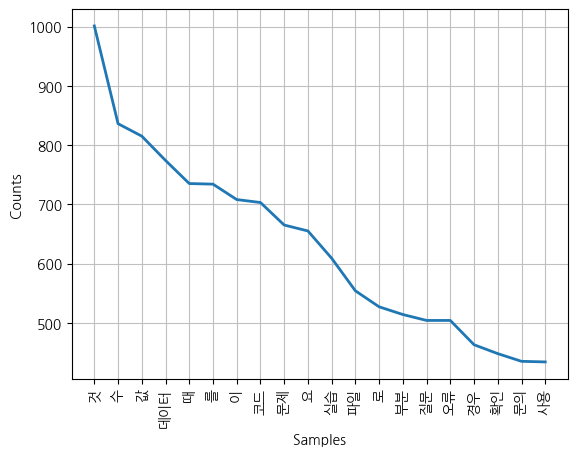

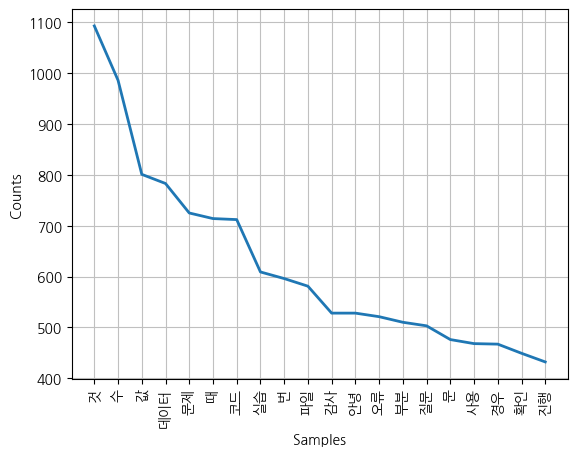

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# * 각각 Frequency 확인 및 분포 시각화
nt_okt_nouns.plot(20)
nt_mecab_nouns.plot(20)

In [ ]:
nt_okt_pos = nltk.Text(okt_PoS)
nt_mecab_pos = nltk.Text(mecab_PoS)

In [ ]:
from nltk import FreqDist

In [ ]:
fd_okt = FreqDist(okt_PoS[0])

In [ ]:
fd_okt.most_common(30)

[(('.', 'Punctuation'), 5),
 ((',', 'Punctuation'), 4),
 (('100', 'Number'), 4),
 (('1', 'Number'), 3),
 (('K', 'Alpha'), 3),
 (('nn', 'Alpha'), 2),
 (('(', 'Punctuation'), 2),
 (('으로', 'Josa'), 2),
 (('self', 'Alpha'), 1),
 (('convs', 'Alpha'), 1),
 (('=', 'Punctuation'), 1),
 (('ModuleList', 'Alpha'), 1),
 (('([', 'Punctuation'), 1),
 (('Conv', 'Alpha'), 1),
 (('2', 'Number'), 1),
 (('d', 'Alpha'), 1),
 (('Co', 'Alpha'), 1),
 (('))', 'Punctuation'), 1),
 (('for', 'Alpha'), 1),
 (('in', 'Alpha'), 1),
 (('Ks', 'Alpha'), 1),
 (('])', 'Punctuation'), 1),
 (('\n', 'Foreign'), 1),
 (('여기', 'Noun'), 1),
 (('서', 'Josa'), 1),
 (('커널', 'Noun'), 1),
 (('사이즈', 'Noun'), 1),
 (('은', 'Noun'), 1),
 (('한', 'Verb'), 1),
 (('단어', 'Noun'), 1)]

In [ ]:
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
NP_grammar = "NP: {<Adjective>*<Noun>*}"

parser_ko = nltk.RegexpParser(grammar)
chunks_ko = parser_ko.parse(okt_PoS[0])

display(chunks_ko)

ModuleNotFoundError: ignored

Tree('S', [Tree('AP', [('self', 'Alpha')]), ('.', 'Punctuation'), Tree('AP', [('convs', 'Alpha')]), Tree('NP', [('1', 'Number')]), ('=', 'Punctuation'), Tree('AP', [('nn', 'Alpha')]), ('.', 'Punctuation'), Tree('AP', [('ModuleList', 'Alpha')]), ('([', 'Punctuation'), Tree('AP', [('nn', 'Alpha')]), ('.', 'Punctuation'), Tree('AP', [('Conv', 'Alpha')]), Tree('NP', [('2', 'Number')]), Tree('AP', [('d', 'Alpha')]), ('(', 'Punctuation'), Tree('NP', [('1', 'Number')]), (',', 'Punctuation'), Tree('AP', [('Co', 'Alpha')]), (',', 'Punctuation'), ('(', 'Punctuation'), Tree('AP', [('K', 'Alpha')]), (',', 'Punctuation'), Tree('NP', [('100', 'Number')]), ('))', 'Punctuation'), Tree('AP', [('for', 'Alpha'), ('K', 'Alpha'), ('in', 'Alpha'), ('Ks', 'Alpha')]), ('])', 'Punctuation'), ('\n', 'Foreign'), Tree('NP', [('1', 'Number')]), ('.', 'Punctuation'), Tree('NP', [('여기', 'Noun')]), ('서', 'Josa'), Tree('NP', [('커널', 'Noun'), ('사이즈', 'Noun')]), Tree('AP', [('K', 'Alpha')]), (',', 'Punctuation'), Tree('

### 3-4. Wordcloud 만들기
* 명사 추출/형태소 분석 결과를 이용하여 WordCloud 객체를 생성
* 최대 글꼴 크기(max_font_size), 최대 단어 수(max_words), 배경 색상(background_color)
* 상대 크기비율(relative_scaling), 그림 크기(width, height), 폰트 경로(font_path=FONT_PATH) 등 설정
* .generate 메서드를 연결하여 WordCloud에 사용될 텍스트 데이터 생성
* plt.imshow(  ) 를 통해 화면에 보여집니다.

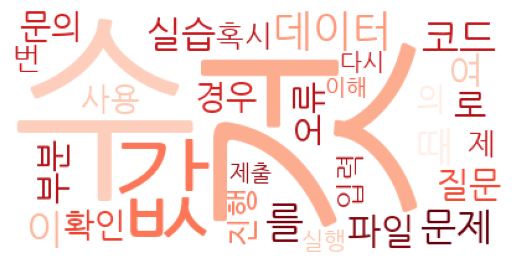

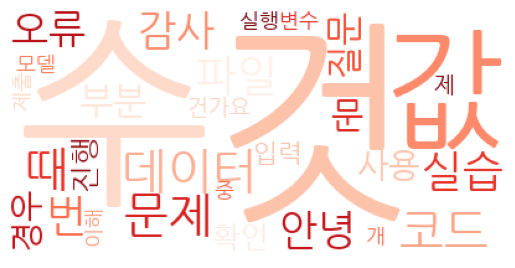

In [ ]:
# 명사 추출/형태소 분석 결과를 이용하여 WordCloud 객체를 생성
wc = WordCloud(font_path = FONT_PATH, # 한글 글씨체 설정
               background_color='white', # 배경색은 흰색으로 
               colormap='Reds', # 글씨색은 빨간색으로
               )
# 최대 글꼴 크기(max_font_size), 최대 단어 수(max_words), 배경 색상(background_color)
# 상대 크기비율(relative_scaling), 그림 크기(width, height), 폰트 경로(font_path=FONT_PATH) 등 설정
# .generate 메서드를 연결하여 WordCloud에 사용될 텍스트 데이터 생성

okt_counts = Counter(nt_okt_nouns)
okt_tags = okt_counts.most_common(30)
okt_cloud = wc.generate_from_frequencies(dict(okt_tags))
# plt.imshow( ) 를 통해 화면에 보여집니다.
plt.imshow(okt_cloud)
plt.axis('off')
plt.show()
print()
mecab_counts = Counter(nt_mecab_nounsnoun)
mecab_tags = mecab_counts.most_common(30)
mecab_cloud = wc.generate_from_frequencies(dict(mecab_tags))
# plt.imshow( ) 를 통해 화면에 보여집니다.
plt.imshow(mecab_cloud)
plt.axis('off')
plt.show()

In [ ]:
okt_counts = Counter(nt_okt_pos)
okt_tags = okt_counts.most_common(30)
okt_cloud = wc.generate_from_frequencies(dict(okt_tags))
# plt.imshow( ) 를 통해 화면에 보여집니다.
plt.imshow(okt_cloud)
plt.axis('off')
plt.show()

TypeError: ignored

## 4. 문의 유형에 따른 분석

### 4-1. *3. 데이터 탐색*에서 실행한 알고리즘을 문의 유형에 따라 실행할 수 있는 함수를 개발합니다.
* 아래 text_analysis 함수를 개발합니다.

In [ ]:
def text_analysis(df, label=None):
    """
    label에 따라서 분석, label이 None인 경우 전체 분석
    데이터 확인, 데이터 길이 시각화
    명사 추출하여 분석, 워드 클라우드 시각화

    Parameters
    ----------
    df : pandas DataFrame object.
    label : Label for analysis, default=None.
    - If label is None, Entire data are analyzed.

    Returns
    -------
    result : None

    """

    # 라벨에 따른 분석

    # 라벨이 없는 경우 전체 분석

    # 데이터 확인, 데이터 길이 시각화

    # 명사 추출하여 분석

    # 워드 클라우드 시각화
    
    pass

### 4-2. 각각의 문의 유형에 대해 실행합니다.

In [ ]:
for label in sorted(train_df.label.unique()):
    text_analysis(train_df,label)

# 단계2 : 데이터 전처리
> * Tokenization(Konlpy...)
> * Vectorization(N-grams, Sequence)
> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-3)

## 5. 데이터 준비
### 5-1. label 아래 형식으로 처리
```python
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}
```

In [13]:
data['label'].value_counts()

코드2       1097
웹          732
이론         728
시스템 운영     561
코드1        488
원격         100
Name: label, dtype: int64

* 전략\
1) 형태소 분석 클래스 선택\
2) 명사, 전부 등\
2) 각각의 나눠진 규칙에 따른 데이터 셋을 생성\
3) 저장

In [14]:
data['text'] = data.text.apply(lambda t:t.replace('\n', ' ').replace('\r', ' ').replace('\t', ' '))
data

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹
2,glob.glob(PATH) 를 사용할 때 질문입니다. PATH에 [ ] 가 포함...,코드2
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2
...,...,...
3701,"토큰화 이후 train val 를 분리하고 각 train set, val set에 ...",코드2
3702,올린 값들 중 최고점인 건가요? 아니면 최근에 올린 파일로 무조건 갱신인가요? 최고...,시스템 운영
3703,수업에서 cacoo랑 packet tracer를 배우는 이유가 1. IT 인프라 ...,이론
3704,inplace =True 해도 값이 변경이 안되고 none으로 뜹니다. 혹시 원격지...,원격


In [15]:
mecab = MeCab()

In [16]:
mecab_morphs = data.text.apply(lambda t: mecab.morphs(t))
mecab_morphs

0       [self, ., convs, 1, =, nn, ., ModuleList, (, [...
1       [현재, 이미지, 를, 여러, 개, 업로드, 하, 기, 위해, 자바, 스크립트, 로...
2       [glob, ., glob, (, PATH, ), 를, 사용, 할, 때, 질문, 입...
3       [tmpp, =, tmp, ., groupby, (, by, =, ', Addr, ...
4       [filename, =, TEST, _, IMAGE, +, str, (, round...
                              ...                        
3701    [토큰, 화, 이후, train, val, 를, 분리, 하, 고, 각, train,...
3702    [올린, 값, 들, 중, 최고점, 인, 건가요, ?, 아니면, 최근, 에, 올린, ...
3703    [수업, 에서, cacoo, 랑, packet, tracer, 를, 배우, 는, 이...
3704    [inplace, =, True, 해도, 값, 이, 변경, 이, 안, 되, 고, n...
3705    [상관, 관계, 는, 그렇게, 크, 지, 않, 게, 나오, 는데, p, -, val...
Name: text, Length: 3706, dtype: object

In [17]:
mecab_nouns = data.text.apply(lambda t:mecab.nouns(t))
mecab_nouns

0                 [여기, 커널, 사이즈, 은, 단어, 최대, 길이, 가정, 선언, 것]
1       [이미지, 개, 업로드, 자바, 스크립트, 동적, 폼, 개, 생성, 데, 클릭, 뭘...
2       [사용, 때, 질문, 포함, 작동, 것, 질문, 제공, 파일, 폴더, 포함, 폴더,...
3                                                [오류, 해결]
4        [안, 폴더, 안, 이미지, 저장, 걸로, 이해, 실행, 폴더, 이미지, 저장, 질문]
                              ...                        
3701    [토큰, 이후, 분리, 벡터, 진행, 데이터, 전, 번, 벡터, 진행, 상관, 머신...
3702      [값, 중, 최고점, 건가요, 최근, 파일, 갱신, 최고점, 값, 경우, 변경, 것]
3703    [수업, 이유, 인프라, 구조, 이해, 시간, 인프라, 구축, 설계, 구성, 비유,...
3704                                  [값, 변경, 원격, 지원, 가능]
3705                              [상관, 관계, 값, 관련, 경우, 해석]
Name: text, Length: 3706, dtype: object

In [18]:
mecab_pos = data.text.apply(lambda t:mecab.pos(t))
mecab_pos

0       [(self, SL), (., SY), (convs, SL), (1, SN), (=...
1       [(현재, MAG), (이미지, NNG), (를, JKO), (여러, MM), (개...
2       [(glob, SL), (., SY), (glob, SL), ((, SSO), (P...
3       [(tmpp, SL), (=, SY), (tmp, SL), (., SY), (gro...
4       [(filename, SL), (=, SY), (TEST, SL), (_, SY),...
                              ...                        
3701    [(토큰, NNG), (화, XSN), (이후, NNG), (train, SL), ...
3702    [(올린, VV+ETM), (값, NNG), (들, XSN), (중, NNB), (...
3703    [(수업, NNG), (에서, JKB), (cacoo, SL), (랑, JC), (...
3704    [(inplace, SL), (=, SY), (True, SL), (해도, VV+E...
3705    [(상관, NNG), (관계, NNG), (는, JX), (그렇게, MAG), (크...
Name: text, Length: 3706, dtype: object

In [24]:
from konlpy.tag import Kkma
kkma = Kkma()
kkma_pos = data.text.apply(lambda t: kkma.pos(t))

#### 모든 데이터에서 품사이름 합치

In [36]:
x_train = pd.DataFrame(columns=['text'])

for n in range(len(mecab_pos)):
    tmp = []
    for m in range(len(mecab_pos[n])):
        tmp.append(str(mecab_pos[n][m][0]) + '//' + str(mecab_pos[n][m][1]))
        
    x_train.loc[n] = ' '.join(tmp)

In [37]:
# 정제된 x_train에 y 값 추가
x_train['label'] = data['label']

label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}

# label 값을 범주형(int) 값으로 변경
x_train['label'] = x_train.label.apply(lambda t:t.replace(t, str(label_dict[t])))
x_train['label'] = x_train['label'].astype('int64')
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3706 entries, 0 to 3705
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3706 non-null   object
 1   label   3706 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 86.9+ KB


#### 특수 품사만 가려서 토큰화
1. list_selector = ['NNG', 'NNP', 'NNB', 'NNBC', 'NR', 'NP', 'VV', 'VA']
2. list_selector2 = {'NNG': 0, 'NNP': 0, 'NNB': 0, 'NNBC': 0, 'NR': 0,
                  'NP': 0, 'VV': 0, 'VA': 0, 'VX': 0, 'VCP': 0,
                  'VCN': 0, 'MAG': 0, 'JKS': 0, 'JKC': 0, 'JKG': 0,
                  'JKO': 0, 'JKB': 0, 'JKV': 0, 'JKQ': 0, 'JC': 0,
                  'JX': 0, 'XPN': 0, 'XSN': 0}
3. 2번으로 선택된 토큰에서 라벨별 중복된 토큰 전부 제거

In [60]:
# NNG 일반 명사, NNP 고유 명사, NNB 의존 명사, NNBC 단위를 나타내는 명사
# NR 수사, NP 대명사, VV 동사, VA 형용사
# list_selector = ['NNG', 'NNP', 'NNB', 'NNBC', 'NR', 'NP', 'VV', 'VA']
list_selector2 = {'NNG': 0, 'NNP': 0, 'NNB': 0, 'NNBC': 0, 'NR': 0,
                  'NP': 0, 'VV': 0, 'VA': 0, 'VX': 0, 'VCP': 0,
                  'VCN': 0, 'MAG': 0, 'JKS': 0, 'JKC': 0, 'JKG': 0,
                  'JKO': 0, 'JKB': 0, 'JKV': 0, 'JKQ': 0, 'JC': 0,
                  'JX': 0, 'XPN': 0, 'XSN': 0}

In [67]:
# mecab_pos 데이터에서 유효하다고 생각하는 품사만으로 parsing
x_train = pd.DataFrame(columns=['text'])

for i in range(len(mecab_pos)):
    tmp = []
    for j in range(len(mecab_pos[i])):
        if mecab_pos[i][j][1] in list_selector2.keys():
            tmp.append(mecab_pos[i][j][0])
            # list_selector2[mecab_pos[i][j][1]] += 1

    x_train.loc[i] = ' '.join(tmp)

In [68]:
# 정제된 x_train에 y 값 추가
x_train['label'] = data['label']

label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}

# label 값을 범주형(int) 값으로 변경
x_train['label'] = x_train.label.apply(lambda t:t.replace(t, str(label_dict[t])))
x_train['label'] = x_train['label'].astype('int64')
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3706 entries, 0 to 3705
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3706 non-null   object
 1   label   3706 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 86.9+ KB


In [69]:
# x_train을 라벨 값에 따라 구분
x_train_0 = x_train.loc[x_train['label'] == 0].reset_index(drop=True)
x_train_1 = x_train.loc[x_train['label'] == 1].reset_index(drop=True)
x_train_2 = x_train.loc[x_train['label'] == 2].reset_index(drop=True)
x_train_3 = x_train.loc[x_train['label'] == 3].reset_index(drop=True)
x_train_4 = x_train.loc[x_train['label'] == 4].reset_index(drop=True)
x_train_0.shape, x_train_1.shape, x_train_2.shape, x_train_3.shape, x_train_4.shape

((1585, 2), (732, 2), (728, 2), (561, 2), (100, 2))

In [70]:
x_train_0_np = np.array(x_train_0['text'])
x_train_1_np = np.array(x_train_1['text'])
x_train_2_np = np.array(x_train_2['text'])
x_train_3_np = np.array(x_train_3['text'])
x_train_4_np = np.array(x_train_4['text'])

In [71]:
# nltk를 사용하여 각 label 마다 사용 빈도수 파악
from nltk import Text, FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.tag import untag

In [72]:
retokenize = RegexpTokenizer('[\w]+')

In [73]:
x_train_0_text = x_train_0_np.tolist()
x_train_1_text = x_train_1_np.tolist()
x_train_2_text = x_train_2_np.tolist()
x_train_3_text = x_train_3_np.tolist()
x_train_4_text = x_train_4_np.tolist()

x_train_0_text = ' '.join(x_train_0_text)
x_train_1_text = ' '.join(x_train_1_text)
x_train_2_text = ' '.join(x_train_2_text)
x_train_3_text = ' '.join(x_train_3_text)
x_train_4_text = ' '.join(x_train_4_text)

text_0 = Text(retokenize.tokenize(x_train_0_text))
text_1 = Text(retokenize.tokenize(x_train_1_text))
text_2 = Text(retokenize.tokenize(x_train_2_text))
text_3 = Text(retokenize.tokenize(x_train_3_text))
text_4 = Text(retokenize.tokenize(x_train_4_text))

In [74]:
fd_name_0 = FreqDist(text_0)
fd_name_1 = FreqDist(text_1)
fd_name_2 = FreqDist(text_2)
fd_name_3 = FreqDist(text_3)
fd_name_4 = FreqDist(text_4)
fd_name_0.N(), fd_name_1.N(), fd_name_2.N(), fd_name_3.N(), fd_name_4.N()

(48722, 16617, 26208, 14205, 1822)

In [75]:
fd_name_0

FreqDist({'가': 1743, '이': 1712, '을': 1559, '를': 1462, '에': 1164, '의': 1057, '있': 923, '에서': 797, '로': 728, '하': 707, ...})

In [76]:
fd_name_0 = untag(fd_name_0.most_common())
fd_name_1 = untag(fd_name_1.most_common())
fd_name_2 = untag(fd_name_2.most_common())
fd_name_3 = untag(fd_name_3.most_common())
fd_name_4 = untag(fd_name_4.most_common())

In [77]:
for n in fd_name_0:
    fd_name_0.remove(n)
    if n in fd_name_1:
        fd_name_1.remove(n)
    if n in fd_name_2:
        fd_name_2.remove(n)
    if n in fd_name_3:
        fd_name_3.remove(n)
    if n in fd_name_4:
        fd_name_4.remove(n)

In [78]:
FreqDist(fd_name_0).N(), FreqDist(fd_name_1).N(), FreqDist(fd_name_2).N(), FreqDist(fd_name_3).N(), FreqDist(fd_name_4).N()

(1180, 877, 1651, 887, 244)

In [80]:
# tmp0 = x_train_0.reset_index(drop=True)
# tmp1 = x_train_1.reset_index(drop=True)
# tmp2 = x_train_2.reset_index(drop=True)
# tmp3 = x_train_3.reset_index(drop=True)
# tmp4 = x_train_4.reset_index(drop=True)

# tmp = pd.concat([tmp0, tmp1, tmp2, tmp3, tmp4], axis=0, join='outer')
# tmp

In [81]:
# tmp0['text_r'] = np.nan
# tmp0

In [82]:
# tmp0['text'].shape[0]

In [83]:
x_train_0['text_r'] = np.nan
x_train_1['text_r'] = np.nan
x_train_2['text_r'] = np.nan
x_train_3['text_r'] = np.nan
x_train_4['text_r'] = np.nan

In [84]:
for i in range(x_train_0.shape[0]):
    tmp = []
    tmp2 = list(x_train_0['text'].iloc[i].split())
    for n in fd_name_0:
        if n in tmp2:
            tmp.append(n)
    x_train_0['text_r'].loc[i] = ' '.join(tmp)

for i in range(x_train_1.shape[0]):
    tmp = []
    tmp2 = list(x_train_1['text'].iloc[i].split())
    for n in fd_name_0:
        if n in tmp2:
            tmp.append(n)
    x_train_1['text_r'].loc[i] = ' '.join(tmp)

for i in range(x_train_2.shape[0]):
    tmp = []
    tmp2 = list(x_train_2['text'].iloc[i].split())
    for n in fd_name_0:
        if n in tmp2:
            tmp.append(n)
    x_train_2['text_r'].loc[i] = ' '.join(tmp)

for i in range(x_train_3.shape[0]):
    tmp = []
    tmp2 = list(x_train_3['text'].iloc[i].split())
    for n in fd_name_0:
        if n in tmp2:
            tmp.append(n)
    x_train_3['text_r'].loc[i] = ' '.join(tmp)

for i in range(x_train_4.shape[0]):
    tmp = []
    tmp2 = list(x_train_4['text'].iloc[i].split())
    for n in fd_name_0:
        if n in tmp2:
            tmp.append(n)
    x_train_4['text_r'].loc[i] = ' '.join(tmp)

<ipython-input-84-d7781e6a8343>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_0['text_r'].loc[i] = ' '.join(tmp)
<ipython-input-84-d7781e6a8343>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_1['text_r'].loc[i] = ' '.join(tmp)
<ipython-input-84-d7781e6a8343>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_2['text_r'].loc[i] = ' '.join(tmp)
<ipython-input-84-d7781e6a8343>:31: SettingWithCopyWarning: 
A va

In [85]:
x_train = pd.concat([x_train_0, x_train_1, x_train_2, x_train_3, x_train_4], axis=0, join='outer')
x_train

,text,label,text_r
0,여기 서 커널 사이즈 은 단어 의 최대 길이 가 이 넘 않 가정 으로 그냥 으로 선언 것,0,이 의 으로 것 않 선언 최대 길이 넘 사이즈
1,를 사용 때 질문 에 가 포함 제대로 작동 않 것 같 질문 제공 주 파일 에 폴더 ...,0,이 를 으로 것 때 안 않 질문 사용 파일 적 정상 작동
2,오류 어떻 해결 좋,0,해결
3,이렇게 하 안 에 폴더 안 에 이미지 들 이 저장 이해 이렇게 실행 폴더 에 이미지...,0,이 하 안 질문 실행 들 이해 저장 이미지
4,첨부 파일 에 번 에 정답 코드 로 시 다 패스 가 출력 문제 에서 요구 오답 경우...,0,이 를 의 에서 하 코드 것 번 않 출력 과 파일 적 다음 첨부 시 수정 조건 문자...
...,...,...,...
95,원격 요청 다시 번 드리,4,번 드리 요청
96,원격 지원 이 실패 종료 다시 도 안 다시 주 감사 합,4,이 안 도 감사 실패 합 지원
97,혹시 원격 지원 부탁,4,혹시 부탁 지원
98,파일 이 아무리 찾 보이 않 혹시 원격 지원 부탁,4,이 않 파일 혹시 부탁 아무리 지원


### 5-1-1 태그 표


"Mecab-ko (ntags=43)"\
Tag	Description\
NNG	일반 명사\
NNP	고유 명사\
NNB	의존 명사\
NNBC	단위를 나타내는 명사\
NR	수사\
NP	대명사\
VV	동사\
VA	형용사\
VX	보조 용언\
VCP	긍정 지정사\
VCN	부정 지정사\
MM	관형사\
MAG	일반 부사\
MAJ	접속 부사\
IC	감탄사\
JKS	주격 조사\
JKC	보격 조사\
JKG	관형격 조사\
JKO	목적격 조사\
JKB	부사격 조사\
JKV	호격 조사\
JKQ	인용격 조사\
JC	접속 조사\
JX	보조사\
EP	선어말어미\
EF	종결 어미\
EC	연결 어미\
ETN	명사형 전성 어미\
ETM	관형형 전성 어미\
XPN	체언 접두사\
XSN	명사파생 접미사\
XSV	동사 파생 접미사\
XSA	형용사 파생 접미사
	
XR	어근\
SF	마침표, 물음표, 느낌표\
SE	줄임표 …\
SSO	여는 괄호 (, [\
SSC	닫는 괄호 ), ]\
SC	구분자 , · / :\
SY	기타 기호\
SH	한자\
SL	외국어\
SN	숫자

In [ ]:
min_text = len(data['text'].min())
max_text = len(data['text'].max())

min_text, max_text

NameError: ignored

In [ ]:
# ratio = the number of samples/number of words per sample
the_number_of_samples = len(data['text'])
sum = 0
for n in data['text']:
    sum += len(n)

number_of_words_per_sample = sum / the_number_of_samples
number_of_words_per_sample

### 5-2. Train Validation split

In [38]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(x_train, test_size=0.3, random_state=1225)
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

print(train_data.shape, test_data.shape)

(2594, 2) (1112, 2)


In [39]:
x_train = train_data['text'].astype('str')
x_test = test_data['text'].astype('str')

y_train = train_data['label']
y_test = test_data['label']

In [ ]:
# x_train = x_train.to_list()
# x_val = x_val.to_list()
# x_test = x_test.to_list()

In [ ]:
# y_train = y_train.values
# y_val = y_val.values
# y_test = y_test.values

In [ ]:
# from tensorflow.keras.utils import to_categorical

# class_n = len(y_train.unique())

# y_train_c = to_categorical(y_train)
# y_test_c = to_categorical(y_test)

## 6. 데이터 처리

### 6-1. 특수문자 제거(Optional)
- [정규표현식 이용](https://docs.python.org/3/howto/regex.html)

### 6-2. N-grams (keras)
> * [scikit-learn working with text data](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#)
> * [scikit-learn text feature extraction](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)
> * [한글 자료](https://datascienceschool.net/03%20machine%20learning/03.01.03%20Scikit-Learn%EC%9D%98%20%EB%AC%B8%EC%84%9C%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EB%8A%A5.html)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Vectorization parameters
# Range (inclusive) of n-gram sizes for tokenizing text
NGRAM_RANGE = (1,2)

# Limit on the number of features. We use the top 20K features.
TOP_K = 20000

# Whether text should be split into word or character n-gram
# One of 'word', 'char'
TOKEN_MODE = 'word'

# Minimum document / corpus frequency below which a token will be discarded.
MIN_DOCUMENT_FREQUENCY = 2

def ngram_vectorize(train_texts, train_labels, val_texts):
    """Vectorizes texts as n-gram vectors.

    1 text = 1 tf-idf vector the length of vocabulary of unigrams + bigrams.

    # Argurments
        train_texts: list, training text strings.
        train_labels: np.ndarray, training labels.
        val_texts: list, validation text strings.

    # Returns
        x_train, x_val = vectorized training and validation texts

    """
    # Create keyword arguments to pass to the 'tf-idf' vectorizer.
    kwargs = {
            'ngram_range': NGRAM_RANGE, # Use 1-grams + 2-grams.
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': TOKEN_MODE, # Split text into word tokens.
            'min_df': MIN_DOCUMENT_FREQUENCY,
    }

    vectorizer = TfidfVectorizer(**kwargs)

    # Learn vocabulary from training texts and vectorize training texts.
    x_train = vectorizer.fit_transform(train_texts)

    # Vectorize validation texts.
    x_val = vectorizer.transform(val_texts)

    # Select top 'k' of the vectorized features.
    selector = SelectKBest(f_classif, k=min(TOP_K, x_train.shape[1]))
    selector.fit(x_train, train_labels)
    x_train = selector.transform(x_train).astype(np.float32)
    x_val = selector.transform(x_val).astype(np.float32)
    return x_train, x_val

In [41]:
x_train_v, x_test_v = ngram_vectorize(x_train, y_train, x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:2072: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  warnings.warn(


In [42]:
print(type(x_train_v), type(x_test_v))
print(x_train_v.shape[0], x_test_v.shape[0])

<class 'scipy.sparse._csr.csr_matrix'> <class 'scipy.sparse._csr.csr_matrix'>
2594 1112


### 6-2-1. N-grams (sklearn)

### 6-3. Sequence (keras, whatever)
> * [keras text classification](https://keras.io/examples/nlp/text_classification_from_scratch/)
> * [tensorflow text classification](https://www.tensorflow.org/tutorials/keras/text_classification)
* tokenizer.fit_on_texts() : 주어진 텍스트 데이터에 대해 단어 사전 생성
* 문장 길이 분포 살펴보기
* 문장 길이를 구해서 기초통계량, histogram, boxplot을 그려보고 적절한 개수를 결정합니다.
* tokenizer.texts_to_sequences() : 주어진 텍스트 데이터를 정수 시퀀스로 변환

### 6-4. Word2Vec (gensim, optional) 
> * [gensim-word2vec-tutorial](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py)
> * [tensorflow-word2vec-tutorial](https://www.tensorflow.org/tutorials/text/word2vec?hl=ko)

In [ ]:
# 아래 함수는 제공합니다.
def get_sent_embeddings(model, embedding_size, tokenized_words):

    # 단어 임베딩 및 n_words의 크기가 0인 feature_vec 배열을 0으로 초기화합니다. 
    # 또한 model.wv.index2word를 사용하여 Word2Vec 모델의 어휘에 단어 세트를 생성합니다.
    feature_vec = np.zeros((embedding_size,), dtype='float32')
    n_words = 0
    index2word_set = set(model.wv.index_to_key)

    # 토큰화된 문장의 각 단어를 반복하고 Word2Vec 모델의 어휘에 존재하는지 확인합니다. 
    # 그렇다면 n_words가 증가하고 단어의 임베딩이 feature_vec에 추가됩니다.
    for word in tokenized_words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])
    
    # Word2Vec 모델의 어휘에 있는 입력 문장에 단어가 있는지 확인합니다. 
    # 있다면 feature_vec를 n_words로 나누어 입력 문장의 평균 임베딩을 구합니다.
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
        
    return feature_vec
def get_dataset(sentences, model, num_features):

    # 각 문장에 대한 임베딩을 보유할 dataset이라는 빈 목록을 초기화합니다.
    dataset = list()

    # 문장의 각 문장을 반복하고 앞에서 설명한 get_sent_embeddings() 함수를 사용하여 문장에 대한 평균 임베딩을 생성합니다. 
    # 결과 문장 임베딩이 데이터 세트 목록에 추가됩니다.
    for sent in sentences:
        dataset.append(get_sent_embeddings(model, num_features, sent))

    # 루프에서 생성된 문장 임베딩을 sent_embedding_vectors라는 2차원 배열에 쌓습니다. 
    sent_embedding_vectors = np.stack(dataset)
    
    return sent_embedding_vectors

### 6-5. 데이터 저장하기
* N-gram, Sequence로 처리한 데이터 저장
* sparse data에 대해서는 scipy.sparse.save_npz 활용

In [43]:
import scipy.sparse
path = '/content/drive/MyDrive/KT_Aivle_School/Data/4th_mini_project/'

scipy.sparse.save_npz(os.path.join(path, 'train_dataset4'), x_train_v)
scipy.sparse.save_npz(os.path.join(path, 'test_dataset4'), x_test_v)

y_train.to_csv(os.path.join(path, 'y_train4.csv'))
y_test.to_csv(os.path.join(path, 'y_test4.csv'))